In [2]:
import geopandas

In [3]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                               Polygon([(2,2), (4,2), (4,4), (2,4)])]) 

polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                                 Polygon([(3,3), (5,3), (5,5), (3,5)])])

df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})


Bad key text.latex.preview in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

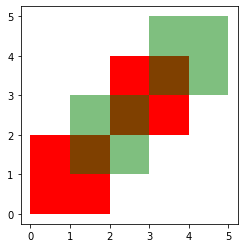

In [4]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

In [5]:
res_union = df1.overlay(df2, how='union')

res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
5,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
6,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


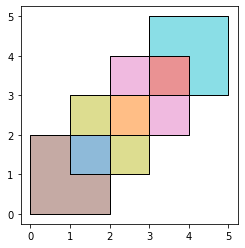

In [6]:
ax = res_union.plot(alpha=0.5, cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [7]:
res_intersection = df1.overlay(df2, how='intersection')

res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."


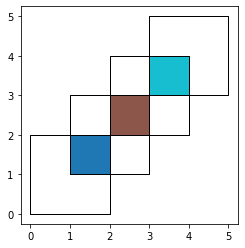

In [8]:
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

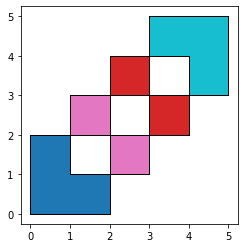

In [9]:
res_symdiff = df1.overlay(df2, how='symmetric_difference')

res_symdiff
ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

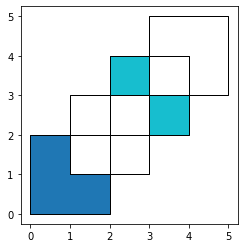

In [10]:
res_difference = df1.overlay(df2, how='difference')

res_difference
ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [11]:
res_identity = df1.overlay(df2, how='identity')

res_identity

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."


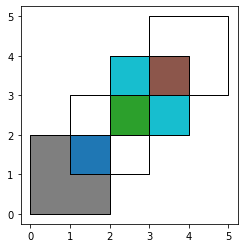

In [12]:
ax = res_identity.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

capitals = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# Select South America and some columns
countries = world[world['continent'] == "South America"]

countries = countries[['geometry', 'name']]

# Project to crs that uses meters as distance measure
countries = countries.to_crs('epsg:3395')

capitals = capitals.to_crs('epsg:3395')

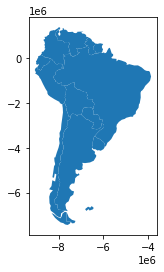

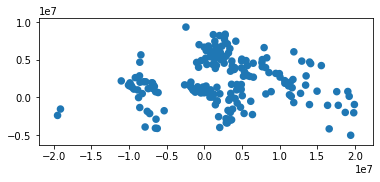

In [14]:
# Look at countries:
countries.plot();

# Now buffer cities to find area within 500km.
# Check CRS -- World Mercator, units of meters.
capitals.crs

# make 500km buffer
capitals['geometry']= capitals.buffer(500000)

capitals.plot();

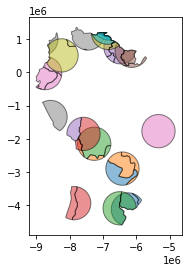

In [15]:
country_cores = countries.overlay(capitals, how='intersection')

country_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');
#only the portion of countries within 500km of a capital, we specify the how option to be “intersect”, which creates a new set of polygons where these two layers overlap:

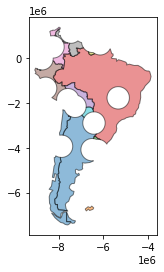

In [16]:
country_peripheries = countries.overlay(capitals, how='difference')

country_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');

aggregation with dissolve() Example

,geometry
continent,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6..."
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012..."
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13..."
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2..."
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421..."


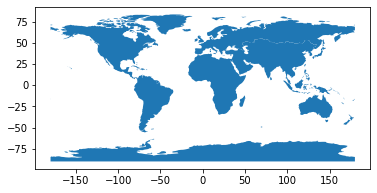

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[['continent', 'geometry']]

continents = world.dissolve(by='continent')

continents.plot();
continents.head()


,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1219176238
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4050
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4389144868
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",746398461
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",573042112


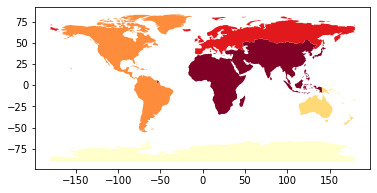

In [18]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[['continent', 'geometry', 'pop_est']]

continents = world.dissolve(by='continent', aggfunc='sum')

continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd');

continents.head()